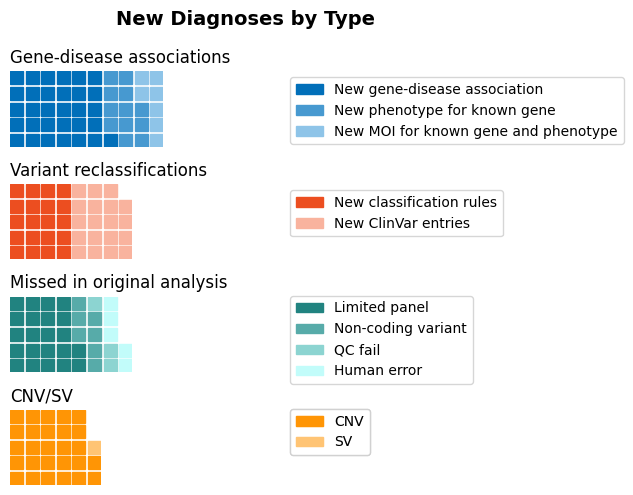

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from pywaffle import Waffle

data_r = pd.read_csv('../../Data/Fig4/Fig4_panel2_Data01.csv', header=0, index_col=0)
data= data_r.T
solve_data = data.sum(axis='columns').to_dict()

colors_list = ['#016FB9', 
        '#4799D0',
        '#8EC4E8',
        '#EC4E20',
        '#F9B39E',
        '#218380',
        '#57ABA9',
        '#8CD4D1', 
        '#C2FCFA',
        '#FF9505',
        '#FFC474']

#print([f"{k} ({v})" for k, v in data['New association'].items()][0:3])

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        411: {
            'values': data['Gene-disease associations'],
            'title': {'label': 'Gene-disease associations', 'loc': 'left', 'fontsize': 12}
        },
        412: {
            'values': data['Variant reclassifications'],
            'title': {'label': 'Variant reclassifications', 'loc': 'left', 'fontsize': 12}
        },
        413: {
            'values': data['Missed in original analysis'],
            'title': {'label': 'Missed in original analysis', 'loc': 'left', 'fontsize': 12}
        },
        414: {
            'values': data['CNV/SV'],
            'title': {'label': 'CNV/SV', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,
    colors=colors_list,
    rounding_rule='ceil',
    figsize=(5, 5)
)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

patches = []
for x in range(len(solve_data)):
    patches.append(mpatches.Patch(color=colors_list[x], label=list(solve_data.keys())[x]))
plt.legend(handles=patches, bbox_to_anchor=(3,2), loc="lower left")

legend1 = plt.legend(handles=patches[0:3], bbox_to_anchor=(3,5.5), loc="upper left")
legend2 = plt.legend(handles=patches[3:5], bbox_to_anchor=(3,4), loc="upper left")
legend3 = plt.legend(handles=patches[5:9], bbox_to_anchor=(3,2.6), loc="upper left")
legend4 = plt.legend(handles=patches[9:11], bbox_to_anchor=(3,1.1), loc="upper left")
fig.add_artist(legend1)
fig.add_artist(legend2)
fig.add_artist(legend3)
fig.add_artist(legend4)

fig.suptitle('New Diagnoses by Type', fontsize=14, fontweight='bold')
fig.savefig('../../Figures/Fig4/Fig4_panel2.png')

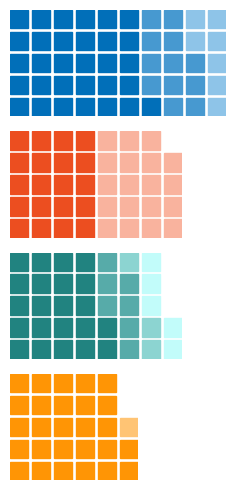

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from pywaffle import Waffle

data_r = pd.read_csv('../../Data/Fig4/Fig4_panel2_Data01.csv', header=0, index_col=0)
data= data_r.T
solve_data = data.sum(axis='columns').to_dict()

colors_list = ['#016FB9', 
        '#4799D0',
        '#8EC4E8',
        '#EC4E20',
        '#F9B39E',
        '#218380',
        '#57ABA9',
        '#8CD4D1', 
        '#C2FCFA',
        '#FF9505',
        '#FFC474']

#print([f"{k} ({v})" for k, v in data['New association'].items()][0:3])

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        411: {
            'values': data['Gene-disease associations'],
            #'title': {'label': 'Gene-disease associations', 'loc': 'left', 'fontsize': 12}
        },
        412: {
            'values': data['Variant reclassifications'],
            #'title': {'label': 'Variant reclassifications', 'loc': 'left', 'fontsize': 12}
        },
        413: {
            'values': data['Missed in original analysis'],
            #'title': {'label': 'Missed in original analysis', 'loc': 'left', 'fontsize': 12}
        },
        414: {
            'values': data['CNV/SV'],
            #'title': {'label': 'CNV/SV', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,
    colors=colors_list,
    rounding_rule='ceil',
    figsize=(5, 5)
)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig.savefig('../../Figures/Fig4/Fig4_panel2.png')

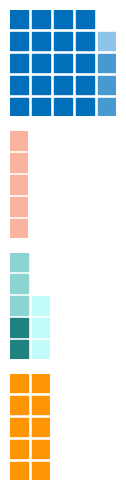

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from pywaffle import Waffle

data_r = pd.read_csv('../../Data/Fig4/Fig4_panel2_Data01_NDD.csv', header=0, index_col=0)
data= data_r.T
solve_data = data.sum(axis='columns').to_dict()

colors_list = ['#016FB9', 
        '#4799D0',
        '#8EC4E8',
        '#EC4E20',
        '#F9B39E',
        '#218380',
        '#57ABA9',
        '#8CD4D1', 
        '#C2FCFA',
        '#FF9505',
        '#FFC474']

#print([f"{k} ({v})" for k, v in data['New association'].items()][0:3])

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        411: {
            'values': data['Gene-disease associations'],
            #'title': {'label': 'Gene-disease associations', 'loc': 'left', 'fontsize': 12}
        },
        412: {
            'values': data['Variant reclassifications'],
            #'title': {'label': 'Variant reclassifications', 'loc': 'left', 'fontsize': 12}
        },
        413: {
            'values': data['Missed in original analysis'],
            #'title': {'label': 'Missed in original analysis', 'loc': 'left', 'fontsize': 12}
        },
        414: {
            'values': data['CNV/SV'],
            #'title': {'label': 'CNV/SV', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,
    colors=colors_list,
    rounding_rule='ceil',
    figsize=(5, 5)
)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig.savefig('../../Figures/Fig4/Fig4_panel2_NDD.png')

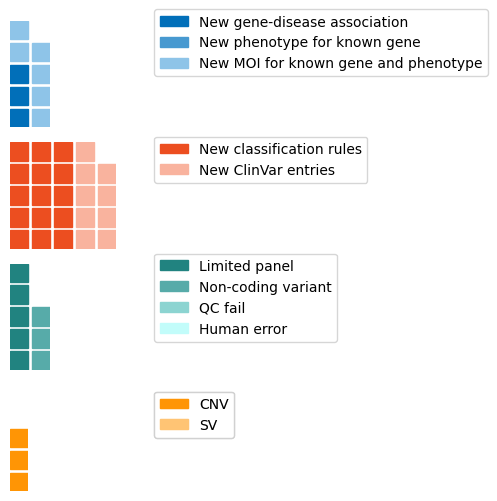

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from pywaffle import Waffle

data_r = pd.read_csv('../../Data/Fig4/Fig4_panel2_Data01_Cardiac.csv', header=0, index_col=0)
data= data_r.T
solve_data = data.sum(axis='columns').to_dict()

colors_list = ['#016FB9', 
        '#4799D0',
        '#8EC4E8',
        '#EC4E20',
        '#F9B39E',
        '#218380',
        '#57ABA9',
        '#8CD4D1', 
        '#C2FCFA',
        '#FF9505',
        '#FFC474']

#print([f"{k} ({v})" for k, v in data['New association'].items()][0:3])

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        411: {
            'values': data['Gene-disease associations'],
            #'title': {'label': 'Gene-disease associations', 'loc': 'left', 'fontsize': 12}
        },
        412: {
            'values': data['Variant reclassifications'],
            #'title': {'label': 'Variant reclassifications', 'loc': 'left', 'fontsize': 12}
        },
        413: {
            'values': data['Missed in original analysis'],
            #'title': {'label': 'Missed in original analysis', 'loc': 'left', 'fontsize': 12}
        },
        414: {
            'values': data['CNV/SV'],
            #'title': {'label': 'CNV/SV', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,
    colors=colors_list,
    rounding_rule='ceil',
    figsize=(5, 5)
)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

patches = []
for x in range(len(solve_data)):
    patches.append(mpatches.Patch(color=colors_list[x], label=list(solve_data.keys())[x]))
plt.legend(handles=patches, bbox_to_anchor=(3,2), loc="lower left")

legend1 = plt.legend(handles=patches[0:3], bbox_to_anchor=(7.5,4.6), loc="upper left")
legend2 = plt.legend(handles=patches[3:5], bbox_to_anchor=(7.5,3.4), loc="upper left")
legend3 = plt.legend(handles=patches[5:9], bbox_to_anchor=(7.5,2.3), loc="upper left")
legend4 = plt.legend(handles=patches[9:11], bbox_to_anchor=(7.5,1.0), loc="upper left")
fig.add_artist(legend1)
fig.add_artist(legend2)
fig.add_artist(legend3)
fig.add_artist(legend4)


# fig.suptitle('New Diagnoses by Type', fontsize=14, fontweight='bold')
fig.savefig('../../Figures/Fig4/Fig4_panel2_Cardiac.png')

/var/folders/m0/03b77j_d7sjfpt0w5ck4cqww0000gq/T/ipykernel_18865/2137108621.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


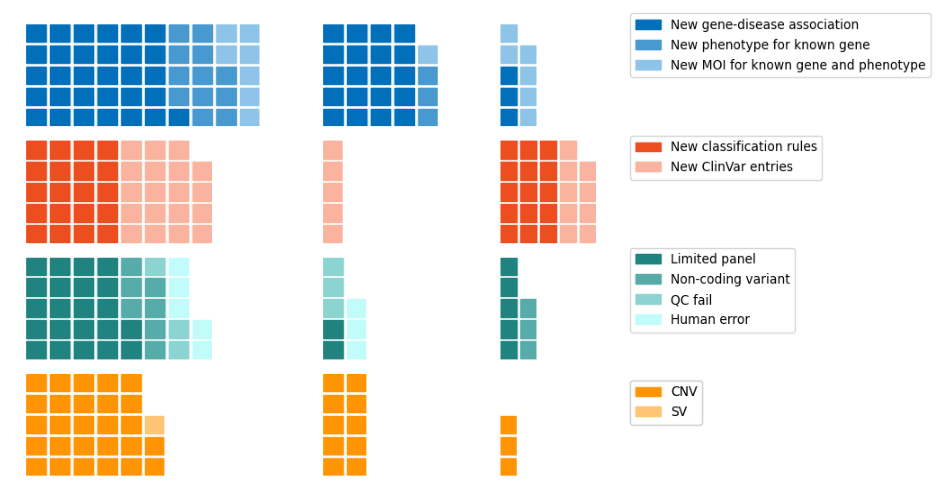

In [120]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to the images
image_paths = ['../../Figures/Fig4/Fig4_panel2.png', '../../Figures/Fig4/Fig4_panel2_NDD.png', '../../Figures/Fig4/Fig4_panel2_Cardiac.png']

# Create a figure with three subplots arranged horizontally with variable widths
fig = plt.figure(figsize=(18, 6))

# Manually add subplots with specific positions
positions = [
    [0.05, 0.1, 0.3, 0.8],  # [left, bottom, width, height] for the first subplot
    [0.215, 0.1, 0.3, 0.8],  # Adjust the left position for the second subplot
    [0.315, 0.1, 0.25, 0.8]  # Adjust the left position for the third subplot
]

# Load and display the images in each subplot
for i, pos in enumerate(positions):
    ax = fig.add_axes(pos)
    img = mpimg.imread(image_paths[i])
    ax.imshow(img, aspect='auto')
    ax.axis('off')  # Turn off the axis

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

fig.savefig('../../Figures/Fig4/Fig4_panel2_All.png')